In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [47]:
#load the dataset
mnist =datasets.mnist.load_data()

In [48]:
#Split it into train and test data

(x_train, y_train), (x_test, y_test) = mnist

In [49]:
print(len(y_train))

60000


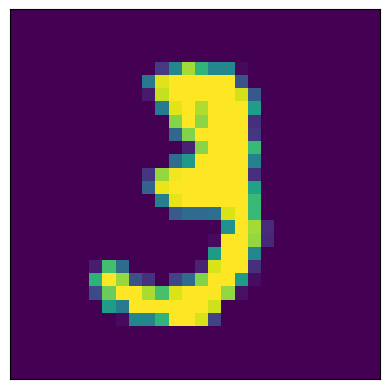

In [14]:
plt.xticks([])
plt.yticks([])
plt.imshow(x_train[10])


In [16]:
print(x_train.max())

255


In [31]:
#Normalize the data

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
#x_train = x_train / 255.0
#x_test = x_test / 255.0

In [32]:
print(x_train.max())

1.0


In [68]:
#Construct the model

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape= (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation= 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation ='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

#You can also construct the model with just flatten and dense layers because of the simplicity of mnist dataset
#model.add(layers.Flatten(input_shape =(28,28)))
#model.add(layers.Dense(128, activation ='relu'))
#model.add(layers.Dense(10,activation ='softmax))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
#compile the mode
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [70]:
#train the model

model.fit(x_train, y_train, epochs = 5, validation_data =(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.8795 - loss: 0.9619 - val_accuracy: 0.9762 - val_loss: 0.0724
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9796 - loss: 0.0657 - val_accuracy: 0.9820 - val_loss: 0.0573
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9842 - loss: 0.0552 - val_accuracy: 0.9847 - val_loss: 0.0606
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9866 - loss: 0.0443 - val_accuracy: 0.9850 - val_loss: 0.0531
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9892 - loss: 0.0347 - val_accuracy: 0.9832 - val_loss: 0.0581


In [71]:
#Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)

print(f"Loss: {loss}  Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9784 - loss: 0.0767
Loss: 0.058143455535173416  Accuracy: 0.9832000136375427


In [72]:
#save the model

model.save('/content/drive/MyDrive/Image Processing/cnn-hand-digit-recognition-system.h5')